In [7]:
import pandas as pd

In [8]:
# Load a CSV file into a DataFrame
df = pd.read_csv('aqi.csv')

In [9]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37662 entries, 0 to 37661
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQCC    37662 non-null  int64  
 1   Name    37662 non-null  object 
 2   X       37662 non-null  float64
 3   Y       37662 non-null  int64  
 4   date    37662 non-null  object 
 5   pm25    26093 non-null  float64
 6   pm10    26154 non-null  float64
 7   o3      19417 non-null  float64
 8   no2     27338 non-null  float64
 9   so2     26836 non-null  float64
 10  co      26131 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 3.2+ MB


In [10]:
# Describe a specific column in the DataFrame
df['pm25'].describe()

count    26093.000000
mean        87.190358
std         33.868981
min          5.000000
25%         63.000000
50%         82.000000
75%        107.000000
max        500.000000
Name: pm25, dtype: float64

In [11]:
df.isnull().sum()

AQCC        0
Name        0
X           0
Y           0
date        0
pm25    11569
pm10    11508
o3      18245
no2     10324
so2     10826
co      11531
dtype: int64

In [12]:
df.head()

,AQCC,Name,X,Y,date,pm25,pm10,o3,no2,so2,co
0,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/2/2024,63.0,63.0,67.0,145.0,7.0,26.0
1,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/3/2024,74.0,69.0,91.0,100.0,5.0,20.0
2,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/4/2024,113.0,70.0,91.0,93.0,5.0,27.0
3,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/5/2024,109.0,59.0,71.0,83.0,11.0,17.0
4,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/7/2024,52.0,NaN,59.0,53.0,7.0,23.0


In [13]:
from datetime import datetime

date_string = "7/2/2024"
date_format = "%m/%d/%Y"

# Convert to datetime object
date_object = datetime.strptime(date_string, date_format)

print("Datetime object:", date_object)

Datetime object: 2024-07-02 00:00:00


In [14]:
df['date_objects'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [15]:
df['year'] = df['date_objects'].dt.year
df['month'] = df['date_objects'].dt.month

In [16]:
df.head()

,AQCC,Name,X,Y,date,pm25,pm10,o3,no2,so2,co,date_objects,year,month
0,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/2/2024,63.0,63.0,67.0,145.0,7.0,26.0,2024-07-02,2024,7
1,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/3/2024,74.0,69.0,91.0,100.0,5.0,20.0,2024-07-03,2024,7
2,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/4/2024,113.0,70.0,91.0,93.0,5.0,27.0,2024-07-04,2024,7
3,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/5/2024,109.0,59.0,71.0,83.0,11.0,17.0,2024-07-05,2024,7
4,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/7/2024,52.0,NaN,59.0,53.0,7.0,23.0,2024-07-07,2024,7


In [17]:
filtered_df = df[df['date_objects'] > pd.Timestamp('2020-01-01')]

In [18]:
filtered_df['pm25'].describe()

count    10584.000000
mean        91.123488
std         32.654343
min          8.000000
25%         67.000000
50%         85.000000
75%        111.000000
max        366.000000
Name: pm25, dtype: float64

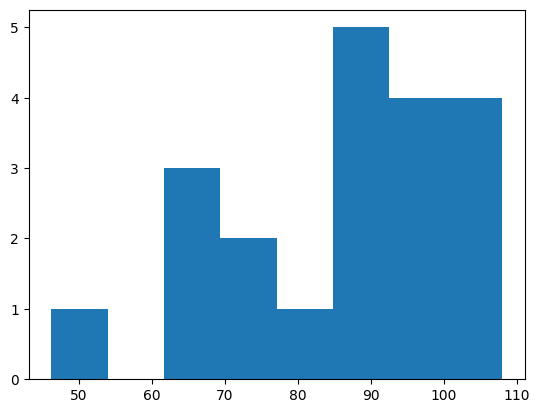

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as spt


aq_df = df.groupby(['Name','X', 'Y']).agg({'pm25':'mean','pm10':'mean','co':'mean','o3':'mean'}).reset_index()

plt.hist(aq_df['pm25'],bins=8);



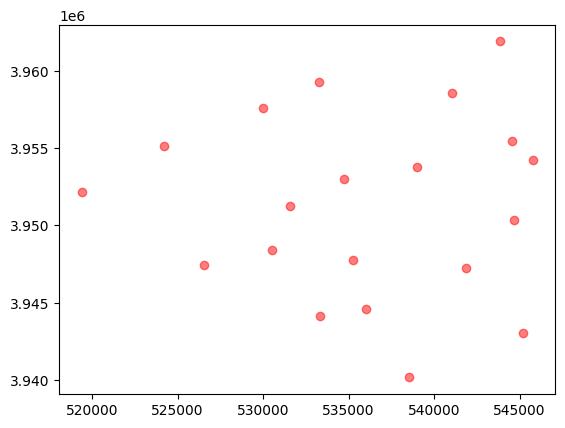

In [20]:
plt.scatter(aq_df['X'],aq_df['Y'],alpha=0.5,c ='red')

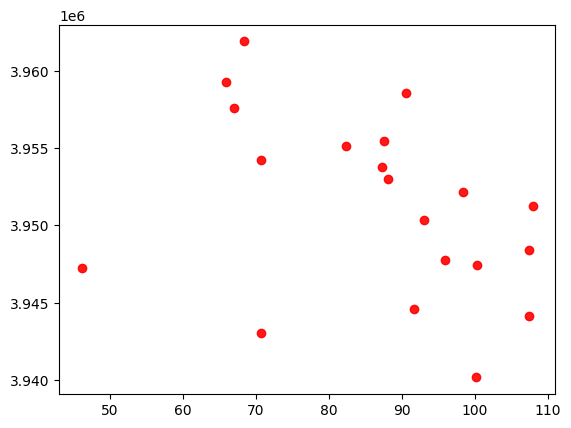

In [21]:
plt.scatter(aq_df['pm25'],aq_df['Y'],alpha=0.9,c ='red')

In [22]:
aq_df = aq_df.dropna()

In [23]:
np.corrcoef(aq_df['pm25'],aq_df['o3'])

array([[1.        , 0.16804059],
       [0.16804059, 1.        ]])

In [24]:
from scipy import stats as spt

spt.pearsonr(aq_df['pm25'],aq_df['pm10'])

PearsonRResult(statistic=np.float64(0.4575463188058781), pvalue=np.float64(0.04251242813341066))

In [25]:
aq_df.drop('Name', axis=1).corr()

,X,Y,pm25,pm10,co,o3
X,1.000000,0.008807,-0.390955,-0.453343,0.089323,0.032594
Y,0.008807,1.000000,-0.368814,-0.566838,-0.119372,0.318755
pm25,-0.390955,-0.368814,1.000000,0.457546,0.482776,0.168041
pm10,-0.453343,-0.566838,0.457546,1.000000,-0.326053,0.052197
co,0.089323,-0.119372,0.482776,-0.326053,1.000000,-0.066533
o3,0.032594,0.318755,0.168041,0.052197,-0.066533,1.000000


<Axes: >

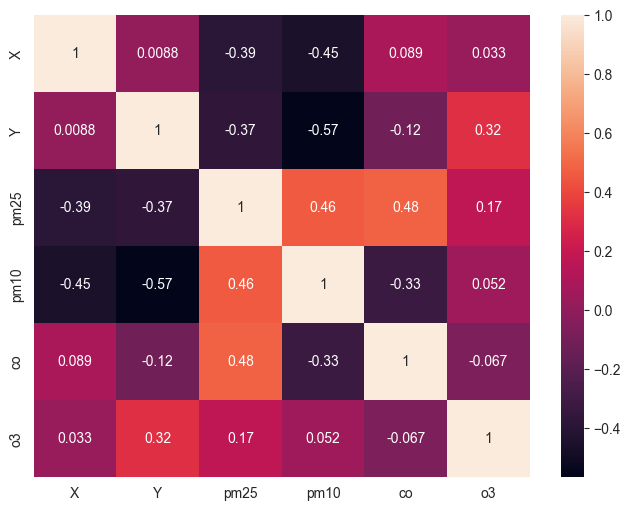

In [26]:
import seaborn as sns

aq_corr = aq_df.drop('Name', axis=1).corr()
sns.set_style("whitegrid")

# set the size
plt.figure(figsize=(8,6))

# plot
sns.heatmap((aq_corr), annot=True)

<Axes: xlabel='o3', ylabel='pm25'>

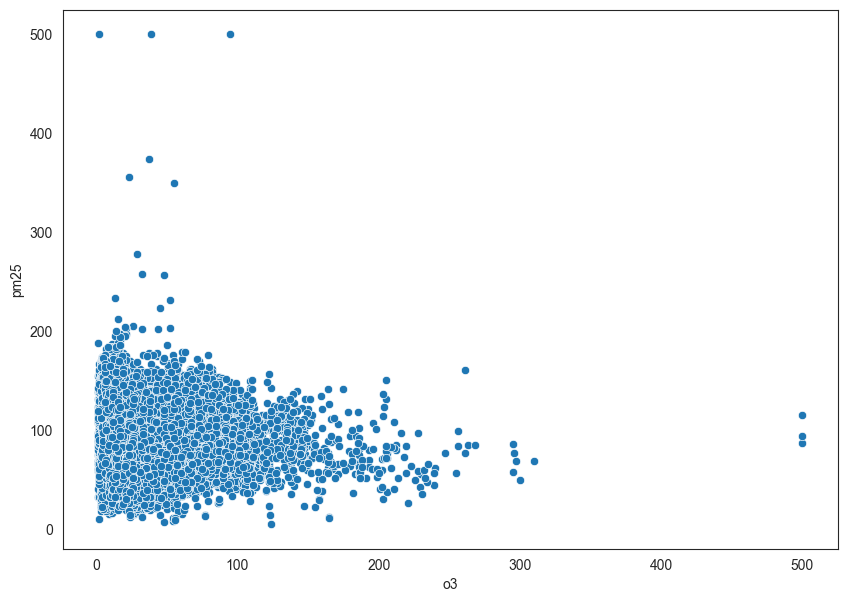

In [27]:
# set the style
sns.set_style("white")

# set the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.scatterplot(data=df, x='o3', y="pm25")

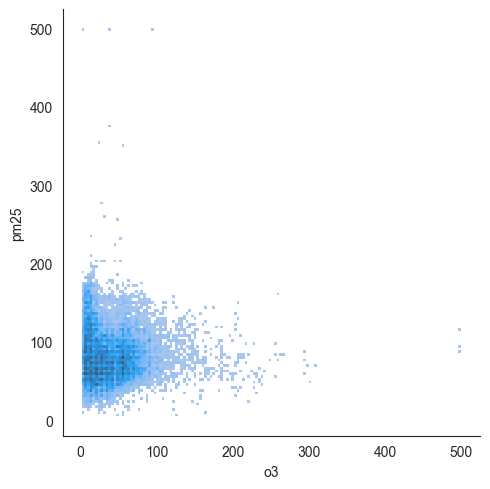

In [28]:
sns.displot(data=df, x='o3', y="pm25")

<Axes: xlabel='Y', ylabel='pm10'>

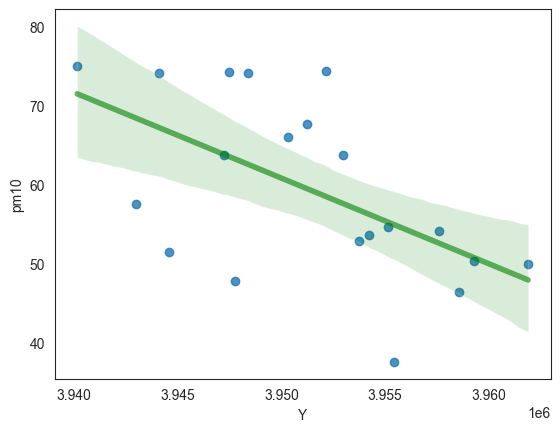

In [29]:
sns.regplot(x=aq_df['Y'], y=aq_df['pm10'], line_kws={"color":"green","alpha":0.6,"lw":4})

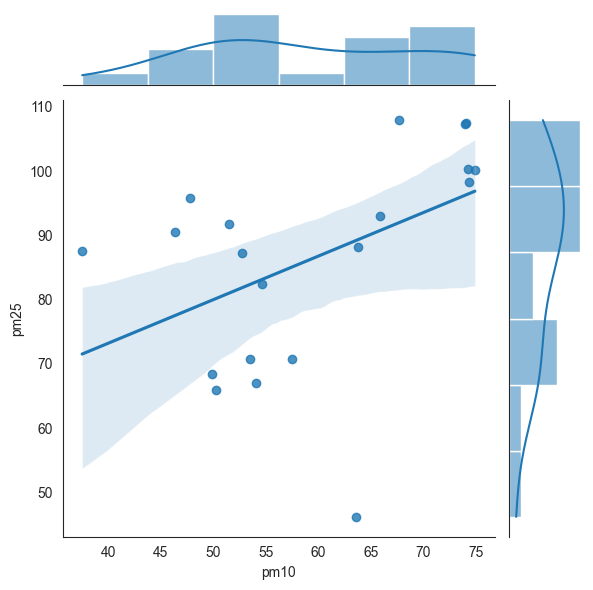

In [30]:
sns.jointplot(data=aq_df, x='pm10', y='pm25', kind="reg")

In [31]:
from sklearn.cluster import KMeans

X=df[['pm10','pm25','co','o3']]
# creating the cluster object
k_means = KMeans(n_clusters=3)
k_means.fit(X)

df['cluster'] = k_means.labels_

sns.displot(data=df,x ='o3',y ='pm25',hue='cluster',alpha=0.9)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Could not interpret value `cluster` for `hue`. An entry with this name does not appear in `data`.

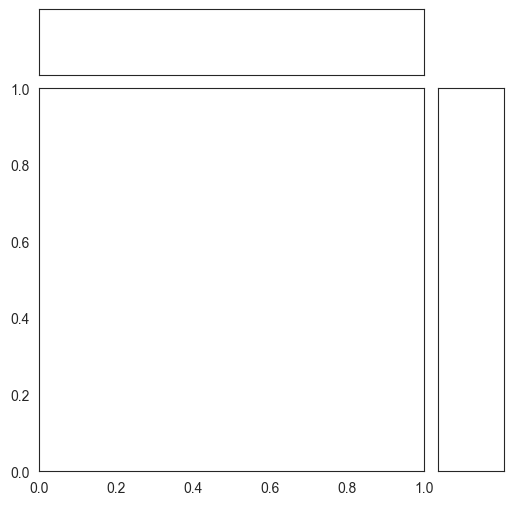

In [32]:
sns.jointplot(data=df,x ='o3',y ='pm25',hue='cluster',alpha=0.5)

In [33]:
import statsmodels.api as sm


df = df.dropna()
independent_Var = df['Y']
dependent_var   = df['pm25']

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     500.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          9.72e-108
Time:                        13:08:57   Log-Likelihood:                -42060.
No. Observations:                8647   AIC:                         8.412e+04
Df Residuals:                    8645   BIC:                         8.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5118.8937    225.092     22.741      0.0

In [34]:
independent_Var = df[['X', 'Y']]
dependent_var   = df['pm25']

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          5.03e-156
Time:                        13:08:57   Log-Likelihood:                -41945.
No. Observations:                8647   AIC:                         8.390e+04
Df Residuals:                    8644   BIC:                         8.392e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5837.7537    227.098     25.706      0.0

In [35]:
import numpy as np
print(np.__file__)

d:\Project\GitHub\pygis101\pygis\Lib\site-packages\numpy\__init__.py


In [43]:
from pysal.lib import weights
from pysal.explore import esda

import geopandas as gpd

df = pd.read_csv('pop85.csv')
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.X, df.Y)
)

gdf.crs = 'epsg:32639'

w = weights.Queen.from_dataframe(gdf)
moran = esda.Moran(gdf["WOMAN_ED"], w)
print("Moran's I:", moran.I)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11344\1245698065.py:13: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)


Moran's I: 0.15553256363240744


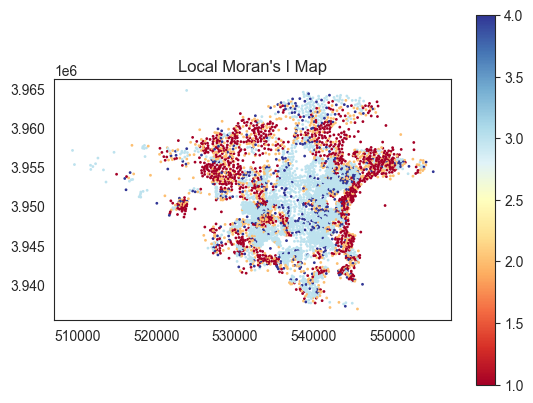

In [53]:

mapclust = esda.Moran_Local(gdf["WOMAN_ED"], w)

gdf["local_moran"] = mapclust.q  # The quadrant information of Moran's I

gdf.plot(column='local_moran', cmap='RdYlBu', markersize=1, legend=True)
plt.title("Local Moran's I Map")
plt.show()

In [93]:
# Function to calculate Moran's I for air quality measurements
def morans_I(locations, values):
    N = len(values)
    dists = np.zeros((N, N))

    # Compute pairwise distances
    for i in range(N):
        for j in range(i + 1, N):
            dists[i, j] = np.linalg.norm(locations[i] - locations[j])
            dists[j, i] = dists[i, j]

    # Calculate weights based on distances
    W = 0.000001 / (dists + 1e-10)  # Add small constant to avoid division by zero
    W_sum = np.sum(W)

    # Moran's I calculation
    I = (N / W_sum) * np.sum((values - np.mean(values)) ** 2) / np.var(values)
    
    return I

# Apply Moran's I to PM2.5 levels
moran_i_result = morans_I(aq_locs, pm25_levels)
print("Moran's I for PM2.5 levels: ", moran_i_result)


Moran's I for PM2.5 levels:  0.0019999999999995998
